# 1. Introducing Scikit-Learn

In [5]:
# https://jakevdp.github.io/PythonDataScienceHandbook/
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


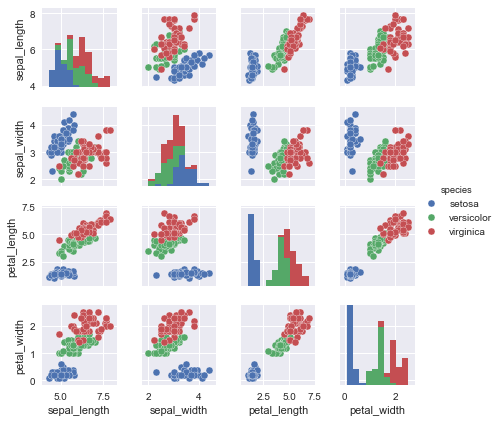

In [2]:
%matplotlib inline
sns.pairplot(iris, hue='species', size=1.5);

In [3]:
# create features matrix by dropping target column "species"
# axis = 0 is default which means drop rows. axis = 1 means drop columns
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
# create target matrix
y_iris = iris['species']
y_iris.shape

(150,)

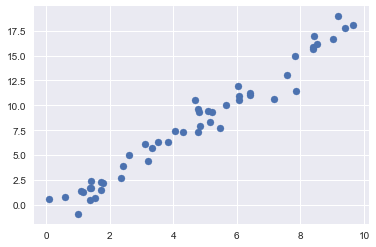

In [5]:
# supervised learning example - regression
rng = np.random.RandomState(1991) # set seed to 1991
x = 10*rng.rand(50) # pick 50 random obs from rng
y = 2*x - 1 + rng.randn(50) # get 50 values from std norm dist
plt.scatter(x,y);

In [6]:
# import linear regression class
from sklearn.linear_model import LinearRegression

# instantiate linear regression class (hyperparameters stored at this time)
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# reshape x into matrix 
X = x[:, np.newaxis] # newaxis increases dimension of array by 1
X.shape

(50, 1)

In [8]:
# fit the model to data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([1.98149989])

In [10]:
model.intercept_ # no CIs on parameters...need to use Statsmodels

-1.1400851252695876

In [11]:
# time to predict
xfit = np.linspace(-1,11) # default n = 50
xfit.shape

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([-3.12158502, -2.63631974, -2.15105446, -1.66578918, -1.1805239 ,
       -0.69525862, -0.20999334,  0.27527194,  0.76053722,  1.2458025 ,
        1.73106778,  2.21633306,  2.70159834,  3.18686362,  3.6721289 ,
        4.15739418,  4.64265946,  5.12792474,  5.61319002,  6.0984553 ,
        6.58372058,  7.06898586,  7.55425114,  8.03951641,  8.52478169,
        9.01004697,  9.49531225,  9.98057753, 10.46584281, 10.95110809,
       11.43637337, 11.92163865, 12.40690393, 12.89216921, 13.37743449,
       13.86269977, 14.34796505, 14.83323033, 15.31849561, 15.80376089,
       16.28902617, 16.77429145, 17.25955673, 17.74482201, 18.23008729,
       18.71535257, 19.20061785, 19.68588313, 20.17114841, 20.65641369])

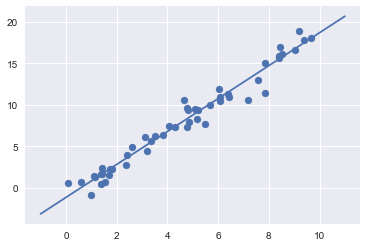

In [12]:
# visualize fitted line
plt.scatter(x,y)
plt.plot(xfit,yfit);

In [13]:
# supervised learning example - classification - Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1991)

In [14]:
# predict labels
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [15]:
# see fraction of predicted labels that match their true value
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9473684210526315

In [16]:
# unsupervised learning example - Iris dimensionality - Principal Component Analysis
from sklearn.decomposition import PCA # 1. choose model class
model = PCA(n_components=2)           # 2. instantiate the model with hyperparameters
model.fit(X_iris)                     # 3. fit to data. notice y not specified!!!
X_2D = model.transform(X_iris)        # 4. transform the data to two dimensions

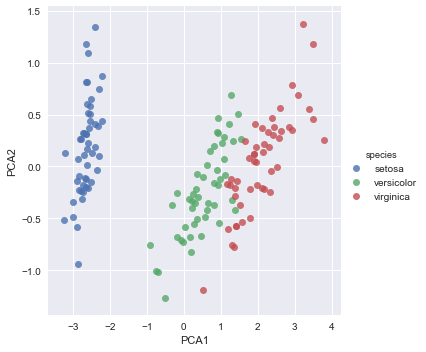

In [17]:
# visualize data

# put data into original Iris df
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# no knowledge of species labels and species fairly well separated

In [18]:
# unsupervised learning example - Iris clustering - Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture                     # 1. choose model class
model = GaussianMixture(n_components=3, covariance_type="full") # 2. instantiate the model with hyperparameters 
model.fit(X_iris)                                               # 3. fit the data. y not specified again!
y_gmm = model.predict(X_iris)                                   # 4. determine cluster labels

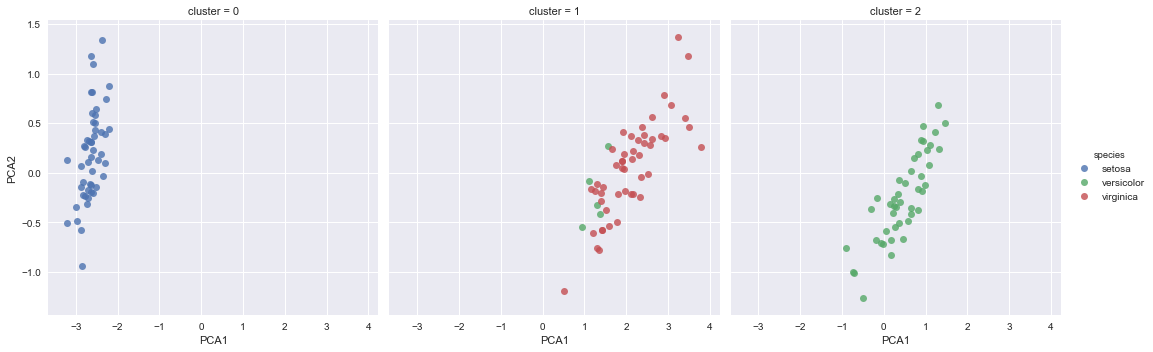

In [19]:
# visualize data

# put data into original Iris df
iris['cluster'] = y_gmm

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, col='cluster', fit_reg=False);

In [20]:
# application - exploring hand written digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 1797 samples that have a grid of 8x8 pixels

(1797, 8, 8)

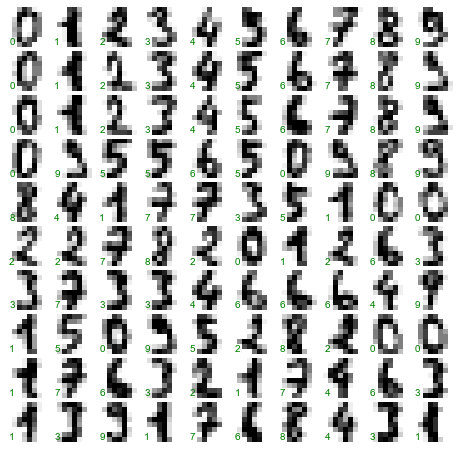

In [21]:
# visualize first 100
fig, axes = plt.subplots(10,  10, figsize=(8, 8), # create a figure with 100 subplots that are size 8x8
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat): # flatten axes to iterate over them
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') # show pixels of digit
    ax.text(0.05, 0.05, str(digits.target[i]), # show the label of digit
            transform=ax.transAxes, color='green')

In [22]:
X = digits.data # the flattened 8x8 grid of pixels for each sample
X.shape

(1797, 64)

In [23]:
y = digits.target # the labels for each digit
y.shape

(1797,)

In [24]:
# unsupervised learning - dimensionality reduction on digits
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data) # reduce to 2 dimensions from 64
data_projected.shape

(1797, 2)

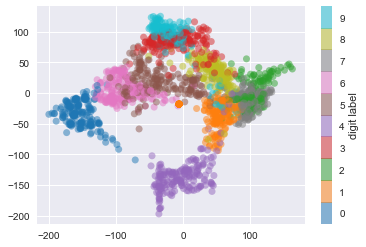

In [25]:
# plot parameter space
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5);

In [26]:
# apply straightforward supervised classifcation algo to digits

# split data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [27]:
# fit Gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [28]:
# Now that we have predicted our model, we can gauge its accuracy 
# by comparing the true values of the test set to the predictions
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(92.68,0.5,'true value')

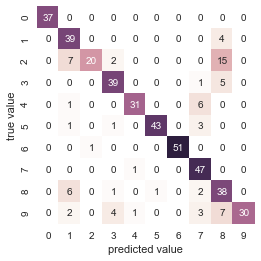

In [29]:
# use confusion matrix to see where prediction went from 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=cmap)
plt.xlabel('predicted value')
plt.ylabel('true value')

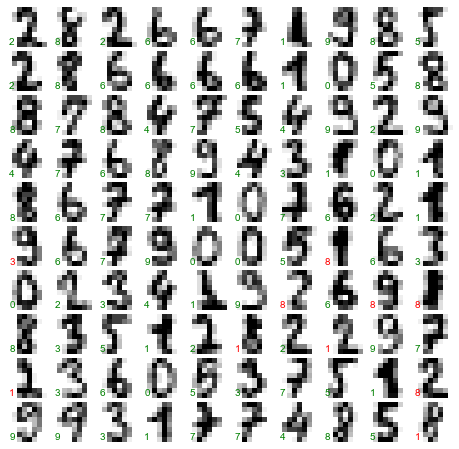

In [30]:
# can see above that the number 2 is often incorrectly predicted as a 1 or 8

# now plot first 100 inputs with predicted labels
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat): # flatten axes to iterate over them
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest') # show pixels of digit
    ax.text(0.05, 0.05, str(y_model[i]), # show the predicted label of digit
            transform=ax.transAxes, 
            color='green' if (ytest[i]==y_model[i]) else 'red')

# 2. Hyperparameters and Model Validation

In [31]:
# the wrong way
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# use k-neighbours classifier
# simple classifier: the label of an unknown point is the same as the label of its closest training point
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# train model
model.fit(X, y)
y_model = model.predict(X)

# calculate fraction of correctly labeled points
accuracy_score(y, y_model)

1.0

In [32]:
# the right way - holdout sets (like out of sample forecasting)

# split into training and test sets - 50% each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate model on second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [33]:
# model validation via two-fold cross-validation
# sequence of fits where each subset of the data is used both as a training set and as a validation set

y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [34]:
# n-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [35]:
# leave-one-out cross-validation
from sklearn.cross_validation import LeaveOneOut # use model_selection
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

C:\Users\mowm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
# take mean to get error rate
scores.mean()

0.96

## Selecting the best model

### Validation curves - bias variance trade off

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [38]:
# create some data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

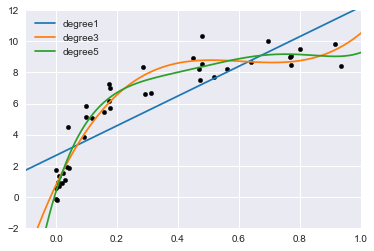

In [39]:
# visualize data with polynomial fits
%matplotlib inline

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
sns.set_palette("tab10") # set color palette for seaborn
plt.scatter(X.ravel(), y, s=20, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

C:\Users\mowm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


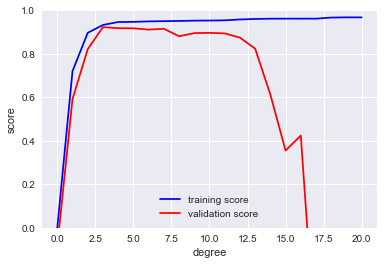

In [40]:
# what degree of polynomial provides a suitable trade-off 
# between bias (under-fitting) and variance (over-fitting)?
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

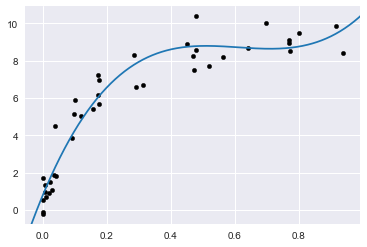

In [41]:
# validation score is at max when a third-order polynomial used

# comuter and display fit over original data using third order polynomial
plt.scatter(X.ravel(), y, s=20, color='black')
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

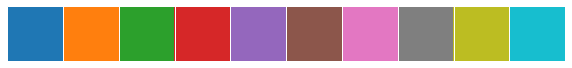

In [11]:
current_palette = sns.color_palette('tab10', 10)
sns.palplot(current_palette)

## Learning curves

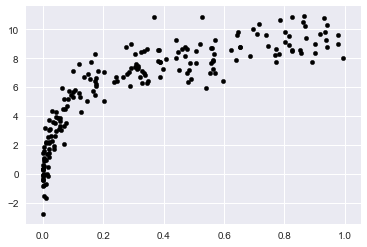

In [43]:
# generate bigger dataset
X2, y2 = make_data(200) # 5x as large as previously
plt.scatter(X2.ravel(), y2, s=20, c='black');

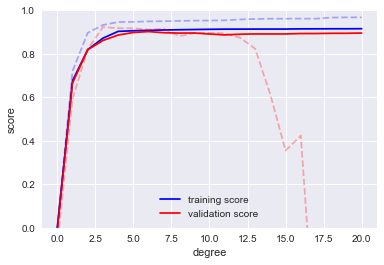

In [44]:
# old and new training and validation curves
degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score,1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score,1), color='red', alpha=0.3, linestyle='dashed' )
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

# the larger dataset can support a much more complicated model

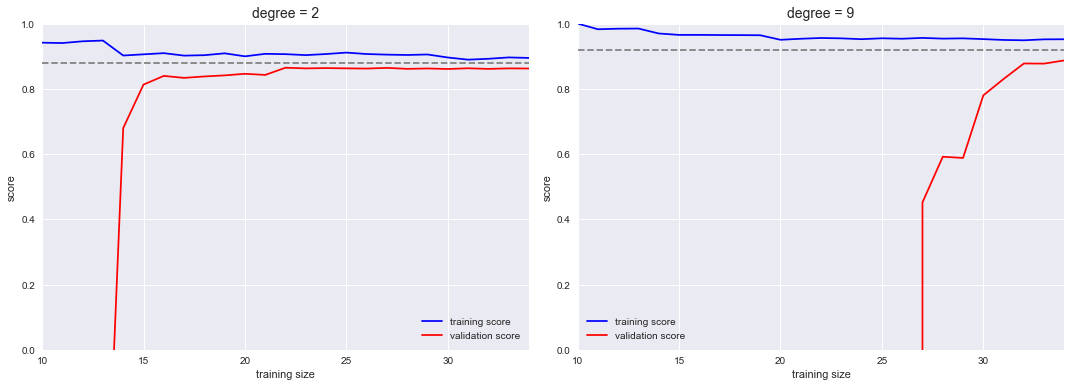

In [45]:
# learning curve: plot of the training/validation score 
# with respect to the size of the training set

# compute a learning curve for our original dataset with a 
# second-order polynomial model and a ninth-order polynomial
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y , cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    # take mean of last training and validation values
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## Validation in practice: Grid Search

In [46]:
# use grid search to find optimal polynomial model
# three-dimensional grid of model features; 

# 1. the polynomial degree, 
# 2. the flag telling us whether to fit the intercept, 
# 3. the flag telling us whether to normalize the problem
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [48]:
# fit the model
grid.fit(X, y);

# ask for best parameters
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

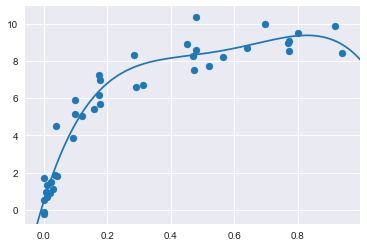

In [60]:
# use the best model and show the fit to the data
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# 3. Feature Engineering

## Categorical Features

In [63]:
# example housing data - list of dictionaries (hashes)
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

# one-hot encoding
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [64]:
# first three columns are neighbourhood labels

# inspect feature names to get column names
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [65]:
# save space by using sparse output
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

In [69]:
# sample phrase data
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

# use count vectorizer to do word count
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [73]:
# inspect in pandas
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [74]:
# weight word counts by frequency using 
# term frequency-inverse document frequency (TF–IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

# tf-idf uses idf(t) = log[(1+n)/(1+df(t))] + 1
# vectors are then normalized by Euclidean norm

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Features

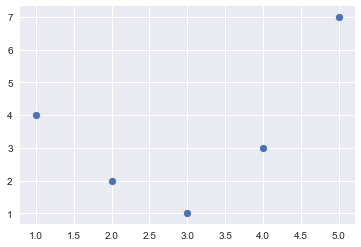

In [12]:
%matplotlib inline
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

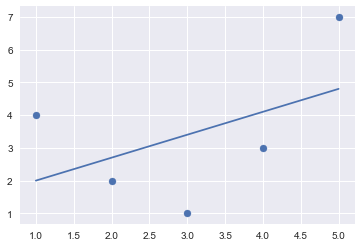

In [8]:
# fit a line using linear regression
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis] # convert array to matrix
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [9]:
# transform data, adding extra columns of features

# add polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)

print(X2) # shows x, x^2 and x^3

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


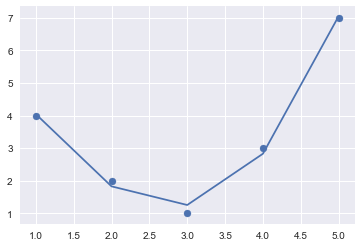

In [10]:
# now re-fit data on expanded input
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputation of Missing Data

In [13]:
from numpy import nan
X = np.array([
    [nan, 0,   3],
    [3,   7,   9],
    [3,   5,   2],
    [4,   nan, 6],
    [8,   8,   1]
])
y = np.array([14, 16, -1, 8, -5])

# fill in nan with mean of column
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [23]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

In [26]:
# processing pipeline:
# 1. impute missing values using mean
# 2. transform features to quadratic
# 3. fit linear regression
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
